In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
burnout_train = pd.read_excel('/content/employee_burnout_analysis.xlsx')
print(burnout_train.shape)

(22750, 9)


In [ ]:
burnout_train["Date of Joining"]=pd.to_datetime(burnout_train["Date of Joining"])

In [ ]:
burnout_train.shape

(22750, 9)

In [ ]:
burnout_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
burnout_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
burnout_train.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
burnout_train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
burnout_train.duplicated().sum()

0

In [ ]:
burnout_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i, col in enumerate(burnout_train.columns):
  print(f"\n\n{burnout_train[col].unique()}")
  print(f"\n{burnout_train[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
burnout_train_2 = burnout_train.copy()

In [ ]:
burnout_train_2.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
burnout_train=burnout_train.drop(['Employee ID'],axis=1)

In [ ]:
intFloatburnout_train=burnout_train.select_dtypes([np.int,np.float])
for i, col in enumerate(intFloatburnout_train.columns):
  if (intFloatburnout_train[col].skew() >= 0.1):
    print("\n",col, "feature is Positively skewed and value is: ",intFloatburnout_train[col].skew())
  elif (intFloatburnout_train[col].skew() <= -0.1):
    print("\n",col, "feature is Negtively skewed and value is: ",intFloatburnout_train[col].skew())
  else:
     print("\n",col,"feature is Normally Distributed and value is: ",intFloatburnout_train[col].skew())



 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negtively skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


In [ ]:
 burnout_train['Resource Allocation'].fillna(burnout_train['Resource Allocation'].mean(),inplace=True)
 burnout_train['Mental Fatigue Score'].fillna(burnout_train['Mental Fatigue Score'].mean(),inplace=True)
 burnout_train['Burn Rate'].fillna(burnout_train['Burn Rate'].mean(),inplace=True)

In [ ]:
burnout_train.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
burnout_train.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


<Axes: >

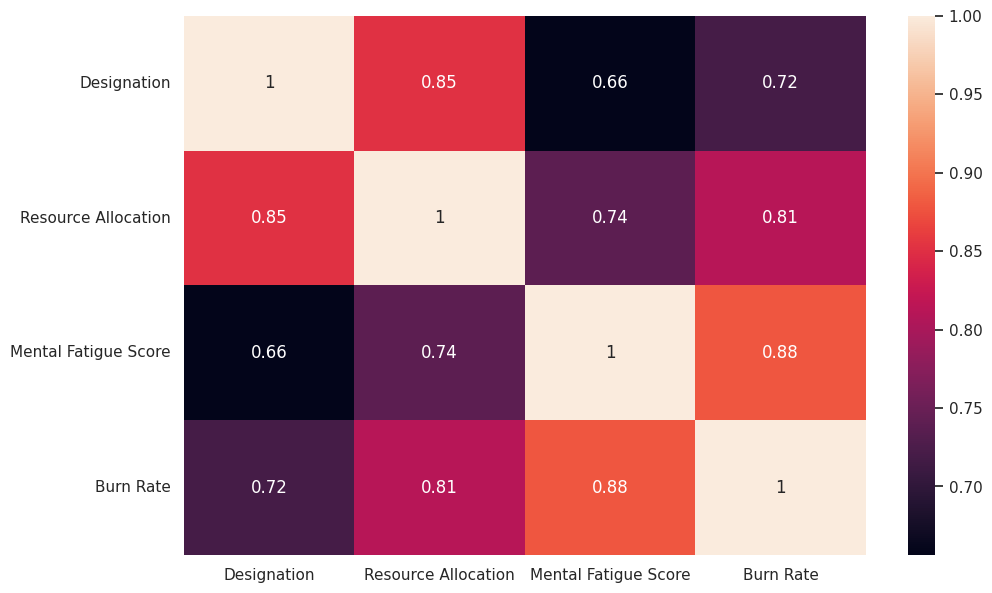

In [ ]:
plt.figure(figsize=(11,7))
corr = burnout_train.corr()
sns.heatmap(corr, annot=True)

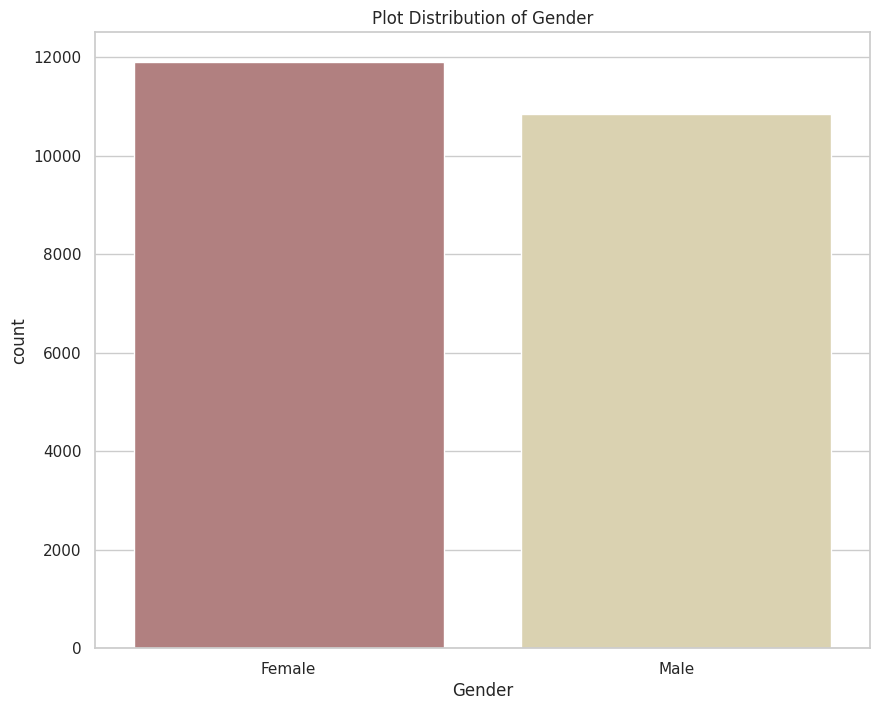

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=burnout_train,palette="pink")
plt.title("Plot Distribution of Gender")
plt.show()

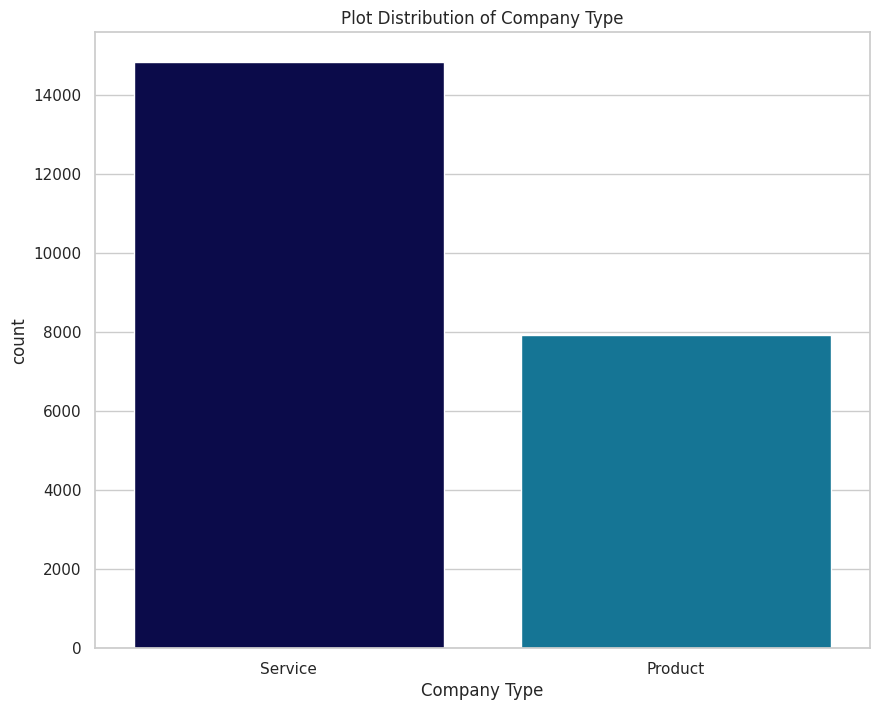

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=burnout_train,palette="ocean")
plt.title("Plot Distribution of Company Type")
plt.show()

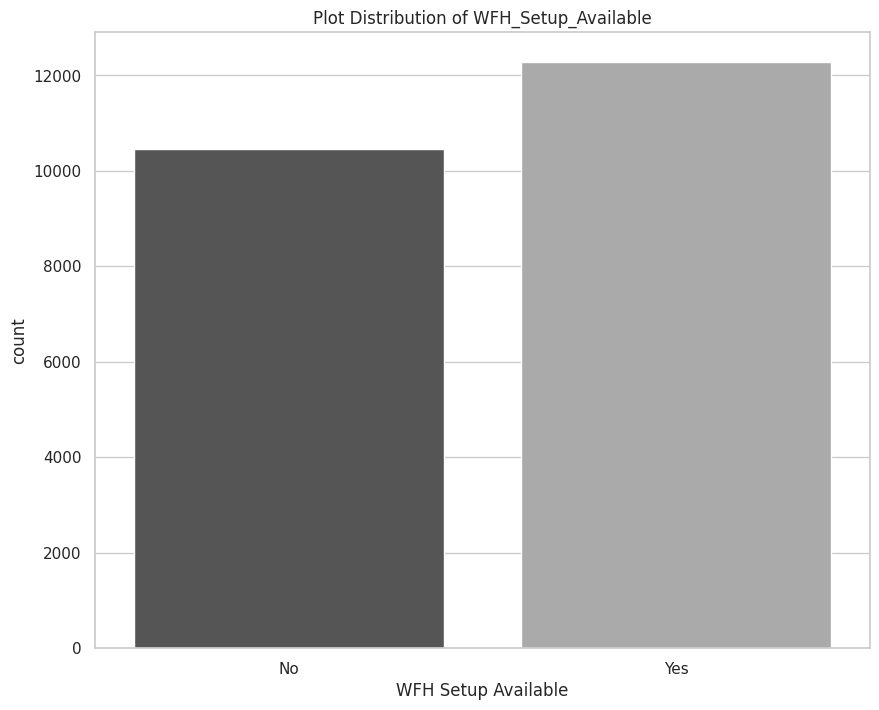

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=burnout_train,palette="gray")
plt.title("Plot Distribution of WFH_Setup_Available")
plt.show()

In [ ]:
burn_st=burnout_train.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st, x=col, title="Plot Distribution of "+col,color_discrete_sequence=['purple'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig=px.line(burnout_train,y="Burn Rate",color="Designation",title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

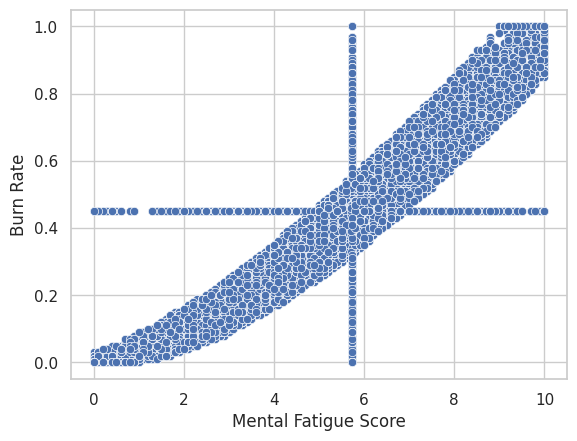

In [ ]:
sns.scatterplot(data=burnout_train, x='Mental Fatigue Score', y='Burn Rate');

In [ ]:
fig=px.line(burnout_train,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.line(burnout_train,y="Mental Fatigue Score",color="Designation",title="Mental Fatigue Score vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

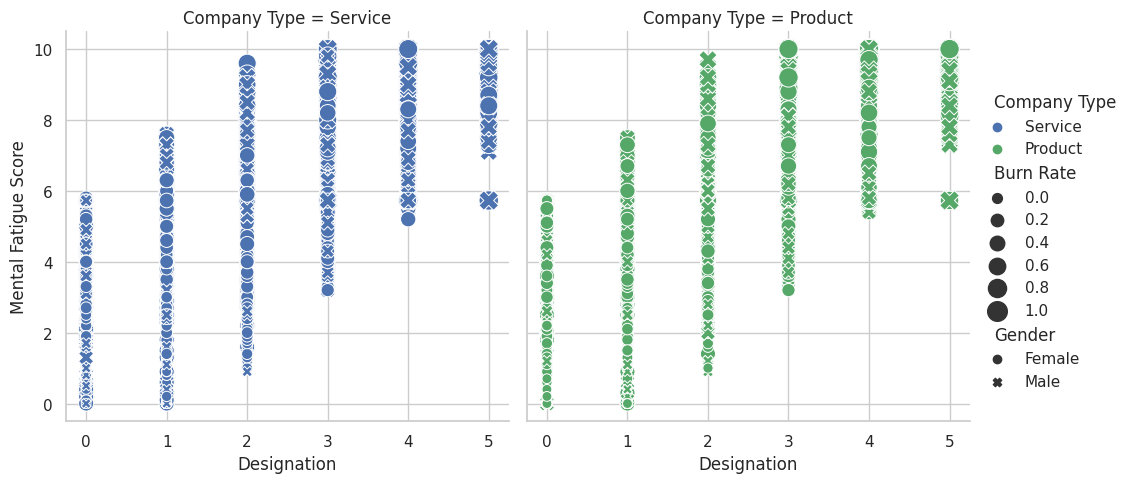

In [ ]:
sns.relplot(
    data=burnout_train,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",
    palette=["b","g"],sizes=(50,200)
)

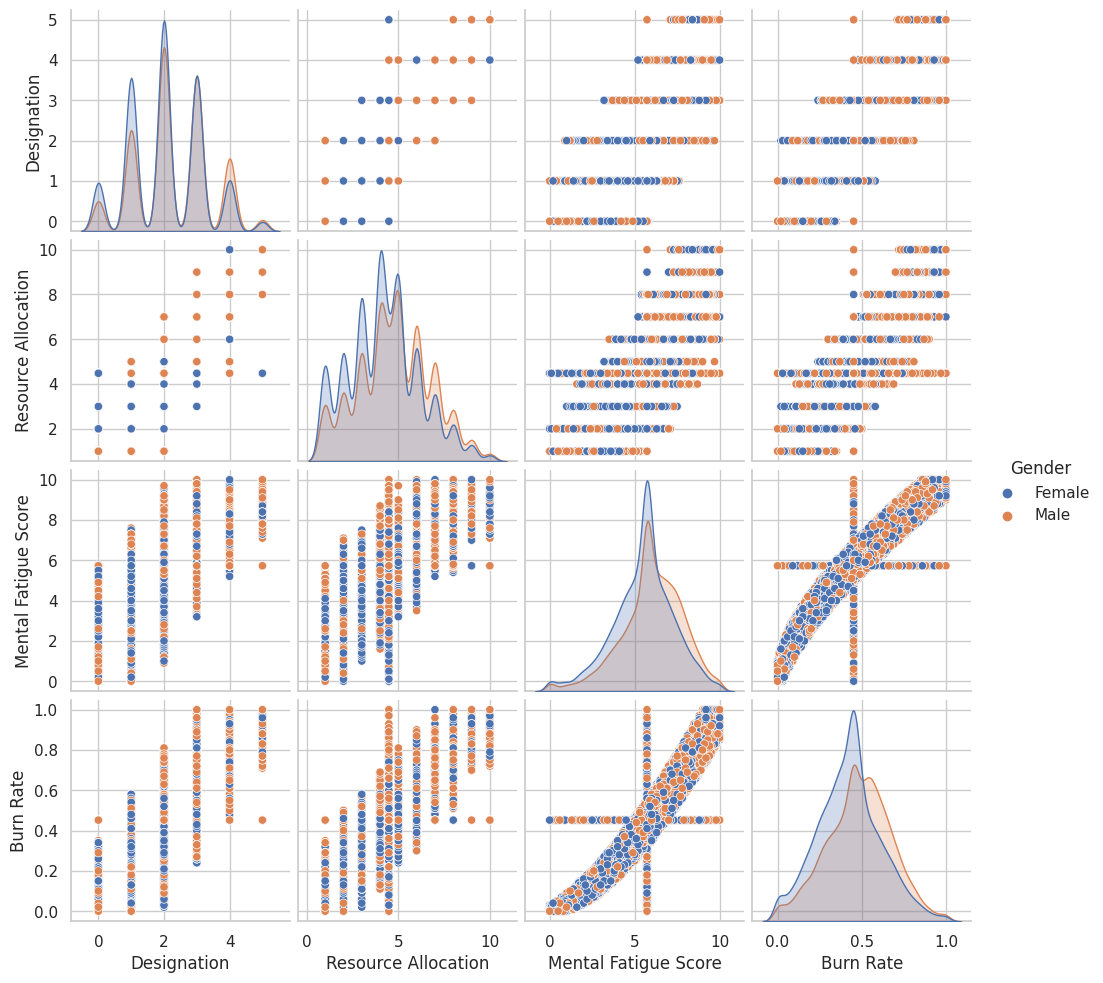

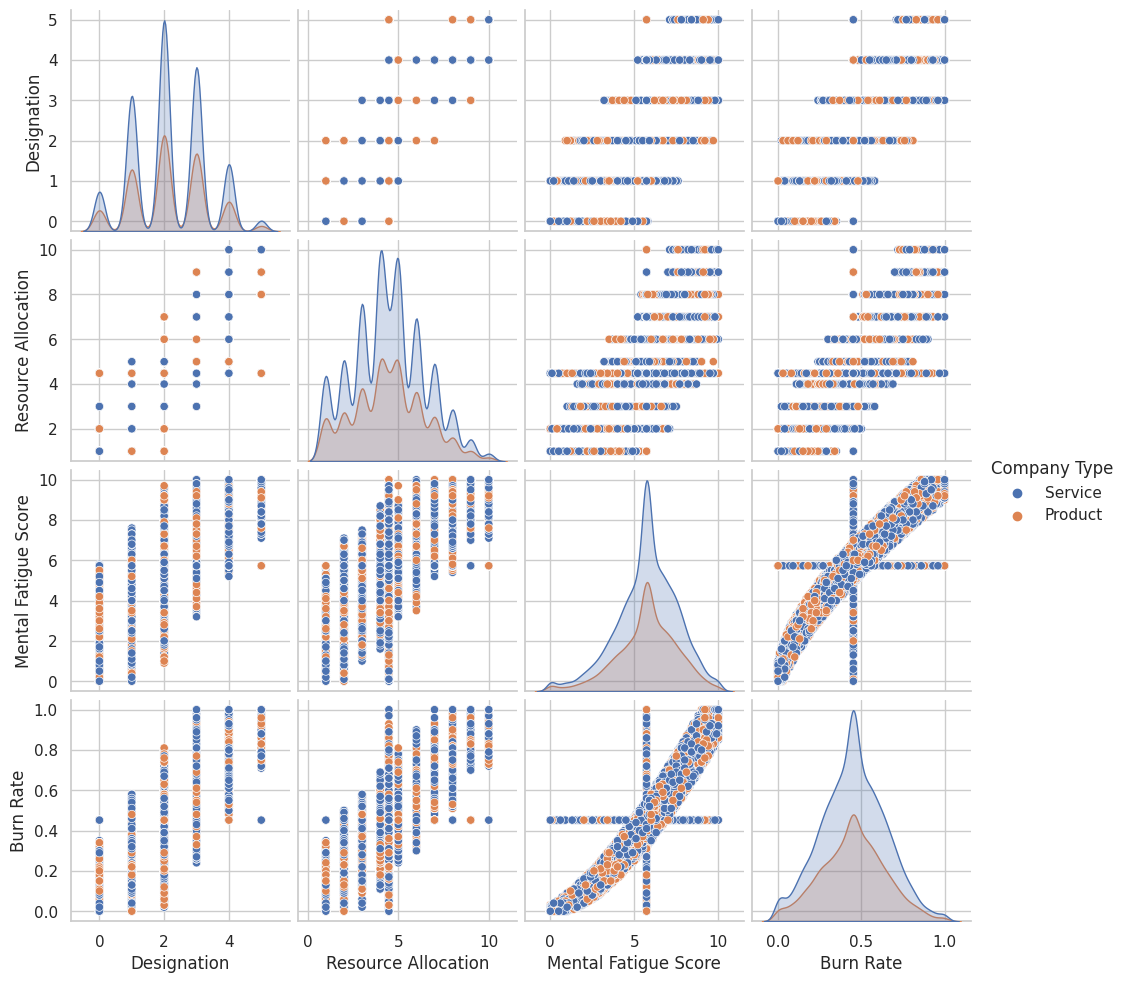

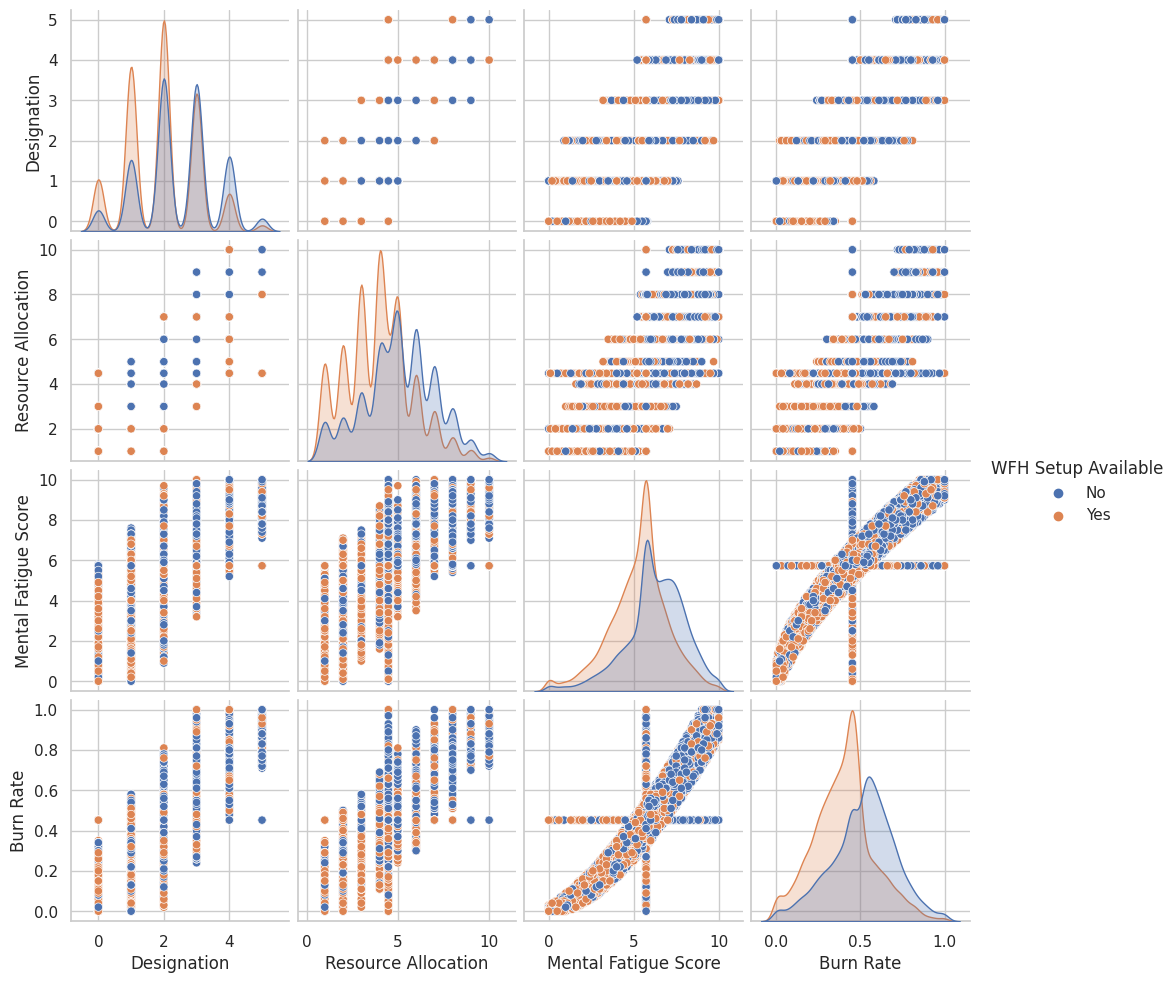

In [ ]:
for c in burnout_train.select_dtypes(object).columns:
    sns.pairplot(burnout_train, hue=c)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
burnout_train['GenderLabel']=le.fit_transform(burnout_train['Gender'].values)
burnout_train['Company_TypeLabel']=le.fit_transform(burnout_train['Company Type'].values)
burnout_train['WFH_Setup_AvailableLabel']=le.fit_transform(burnout_train['WFH Setup Available'].values)
gn=burnout_train.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
ct=burnout_train.groupby('Company Type')
ct=ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
wfh=burnout_train.groupby('WFH Setup Available')
wfh=wfh['WFH_Setup_AvailableLabel']
wfh.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
burnout_train.tail(20)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22730,2008-10-07,Male,Service,Yes,2,4.0,5.300000,0.490000,1,1,1
22731,2008-01-24,Male,Service,Yes,2,4.0,5.500000,0.390000,1,1,1
22732,2008-12-21,Female,Service,No,2,4.0,6.300000,0.390000,0,1,0
22733,2008-07-16,Female,Service,No,2,3.0,4.500000,0.452005,0,1,0
22734,2008-12-07,Male,Product,No,3,7.0,6.500000,0.620000,1,0,0
22735,2008-07-26,Male,Service,No,3,7.0,7.300000,0.640000,1,1,0
22736,2008-04-18,Male,Service,Yes,4,7.0,7.700000,0.650000,1,1,1
22737,2008-08-17,Female,Service,No,3,5.0,5.728188,0.430000,0,1,0
22738,2008-12-23,Male,Service,Yes,0,1.0,4.900000,0.290000,1,1,1
22739,2008-02-06,Male,Service,No,2,5.0,8.500000,0.670000,1,1,0


In [ ]:
Columns=['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=burnout_train[Columns]
y=burnout_train['Burn Rate']

In [ ]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
print("PCA shape of x is: ",x_pca.shape, "and original shape is: ",x.shape)
print("% of importance of selected features is:",pca.explained_variance_ratio_)
print("The number of features selected through PCA is:",pca.n_components_)

PCA shape of x is:  (22750, 4) and original shape is:  (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is: 4


In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test,Y_train, Y_test=train_test_split(x_pca,y, test_size=0.25,random_state=10)
print(X_train_pca.shape, X_test.shape,Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


***IMPLEMENTATION***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost


from sklearn.metrics import r2_score

In [ ]:
def print_r2_score(y_train, train_pred, y_test, test_pred):
    r2_train = r2_score(Y_train, train_pred)
    print("Accuracy Score of train data: "+str(round(100*r2_train, 4))+" %")

    r2_test = r2_score(Y_test, test_pred)
    print("Accuracy score of test data: "+str(round(100*r2_test, 4))+" %")

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_pca, Y_train)

train_pred_linear = lr_model.predict(X_train_pca)
test_pred_linear = lr_model.predict(X_test)
print_r2_score(Y_train, train_pred_linear, Y_test, test_pred_linear)

Accuracy Score of train data: 83.1262 %
Accuracy score of test data: 82.9367 %


In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)

train_pred_rf = rf_model.predict(X_train_pca)
test_pred_rf = rf_model.predict(X_test)
print_r2_score(Y_train, train_pred_rf, Y_test, test_pred_rf)

Accuracy Score of train data: 91.1928 %
Accuracy score of test data: 83.8452 %


In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train_pca, Y_train)

train_pred_ridge = ridge_model.predict(X_train_pca)
test_pred_ridge = ridge_model.predict(X_test)
print_r2_score(Y_train, train_pred_ridge, Y_test, test_pred_ridge)

Accuracy Score of train data: 83.1262 %
Accuracy score of test data: 82.9367 %


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_pca, Y_train)

train_pred_lasso = lasso_model.predict(X_train_pca)
test_pred_lasso = lasso_model.predict(X_test)
print_r2_score(Y_train, train_pred_lasso, Y_test, test_pred_lasso)

Accuracy Score of train data: 76.5407 %
Accuracy score of test data: 76.0898 %


In [ ]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_pca, Y_train)

train_pred_elastic = elastic_model.predict(X_train_pca)
test_pred_elastic = elastic_model.predict(X_test)
print_r2_score(Y_train, train_pred_elastic, Y_test, test_pred_elastic)

Accuracy Score of train data: 0.0 %
Accuracy score of test data: -0.0039 %


In [ ]:
svr_model = SVR(C=1, gamma=1e-6)
svr_model.fit(X_train_pca, Y_train)

train_pred_svr = svr_model.predict(X_train_pca)
test_pred_svr = svr_model.predict(X_test)
print_r2_score(Y_train, train_pred_svr, Y_test, test_pred_svr)

Accuracy Score of train data: 64.6769 %
Accuracy score of test data: 64.2846 %


In [ ]:
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)

train_pred_abr = abr_model.predict(X_train_pca)
test_pred_abr = abr_model.predict(X_test)
print_r2_score(Y_train, train_pred_abr, Y_test, test_pred_abr)

Accuracy Score of train data: 77.2384 %
Accuracy score of test data: 76.7458 %


In [ ]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_pca, Y_train)

train_pred_gbr = gbr_model.predict(X_train_pca)
test_pred_gbr = gbr_model.predict(X_test)
print_r2_score(Y_train, train_pred_gbr, Y_test, test_pred_gbr)

Accuracy Score of train data: 86.2639 %
Accuracy score of test data: 85.24 %


In [ ]:
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train_pca, Y_train)

train_pred_mlp = mlp_model.predict(X_train_pca)
test_pred_mlp = mlp_model.predict(X_test)
print_r2_score(Y_train, train_pred_mlp, Y_test, test_pred_mlp)

Accuracy Score of train data: 84.9078 %
Accuracy score of test data: 84.5848 %
